## 设计基函数(basis function) 以及数据读取

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def identity_basis(x):
    ret = np.expand_dims(x, axis=1)
    return ret

def multinomial_basis(x, feature_num=10):
    x = np.expand_dims(x, axis=1) # shape(N, 1)
    feat = [x]
    for i in range(2, feature_num+1):
        feat.append(x**i)
    ret = np.concatenate(feat, axis=1)
    return ret

def gaussian_basis(x, feature_num=10):
    centers = np.linspace(0, 25, feature_num)
    width = 1.0 * (centers[1] - centers[0])
    x = np.expand_dims(x, axis=1)
    x = np.concatenate([x]*feature_num, axis=1)
    
    out = (x-centers)/width
    ret = np.exp(-0.5 * out ** 2)
    return ret

def load_data(filename, basis_func=gaussian_basis):
    """载入数据。"""
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        xs, ys = np.asarray(xs), np.asarray(ys)
        
        o_x, o_y = xs, ys
        phi0 = np.expand_dims(np.ones_like(xs), axis=1)
        phi1 = basis_func(xs)
        xs = np.concatenate([phi0, phi1], axis=1)
        return (np.float32(xs), np.float32(ys)), (o_x, o_y)

## 定义模型

In [2]:
import tensorflow as tf
from tensorflow.keras import optimizers, layers, Model

class linearModel(Model):
    def __init__(self, ndim):
        super(linearModel, self).__init__()
        self.w = tf.Variable(
            shape=[ndim, 1], 
            initial_value=tf.random.uniform(
                [ndim,1], minval=-0.1, maxval=0.1, dtype=tf.float32))
        
    @tf.function
    def call(self, x):
        y = tf.squeeze(tf.matmul(x, self.w), axis=1)
        return y

(xs, ys), (o_x, o_y) = load_data('train.txt')        
ndim = xs.shape[1]

model = linearModel(ndim=ndim)


## 训练以及评估

In [3]:
optimizer = optimizers.Adam(0.1)
@tf.function
def train_one_step(model, xs, ys):
    with tf.GradientTape() as tape:
        y_preds = model(xs)
        loss = tf.reduce_mean(tf.sqrt(1e-12+(ys-y_preds)**2))
    grads = tape.gradient(loss, model.w)
    optimizer.apply_gradients([(grads, model.w)])
    return loss

@tf.function
def predict(model, xs):
    y_preds = model(xs)
    return y_preds

def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

loss is 1.278
loss is 1.233
loss is 1.188
loss is 1.143
loss is 1.097
loss is 1.05
loss is 1.002
loss is 0.9514
loss is 0.8989
loss is 0.8451
loss is 0.7891
loss is 0.7312
loss is 0.6717
loss is 0.6098
loss is 0.5453
loss is 0.4787
loss is 0.4361
loss is 0.3878
loss is 0.3671
loss is 0.3531
loss is 0.3418
loss is 0.3318
loss is 0.3238
loss is 0.3171
loss is 0.3116
loss is 0.3069
loss is 0.3033
loss is 0.3003
loss is 0.2979
loss is 0.2956
loss is 0.2936
loss is 0.2925
loss is 0.2917
loss is 0.2907
loss is 0.2902
loss is 0.2896
loss is 0.2895
loss is 0.2892
loss is 0.2888
loss is 0.2888
loss is 0.2885
loss is 0.2887
loss is 0.2882
loss is 0.2881
loss is 0.2881
loss is 0.2881
loss is 0.2882
loss is 0.2893
loss is 0.2886
loss is 0.2881
loss is 0.2882
loss is 0.2881
loss is 0.289
loss is 0.288
loss is 0.2882
loss is 0.2897
loss is 0.288
loss is 0.2882
loss is 0.2881
loss is 0.2883
loss is 0.2877
loss is 0.2878
loss is 0.2878
loss is 0.2884
loss is 0.2881
loss is 0.2879
loss is 0.288
loss is

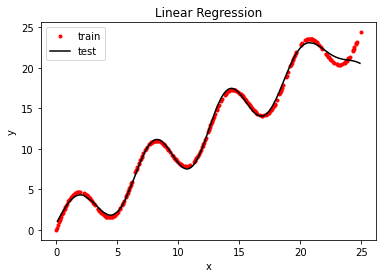

In [ ]:
for i in range(10000):
    loss = train_one_step(model, xs, ys)
    if i % 100 == 1:
        print(f'loss is {loss:.4}')
        
        
y_preds = predict(model, xs)
std = evaluate(ys, y_preds)
print('训练集预测值与真实值的标准差：{:.1f}'.format(std))

(xs_test, ys_test), (o_x_test, o_y_test) = load_data('test.txt')

y_test_preds = predict(model, xs_test)
std = evaluate(ys_test, y_test_preds)
print('训练集预测值与真实值的标准差：{:.1f}'.format(std))

plt.plot(o_x, o_y, 'ro', markersize=3)
plt.plot(o_x_test, y_test_preds, 'k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend(['train', 'test', 'pred'])
plt.show()
